In [206]:
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

import torchaudio.datasets
import torch.nn.functional as F

import torch.utils.data as data


In [207]:
train_data = torchaudio.datasets.LIBRISPEECH("./", url="train-clean-100", download=True)

In [208]:
def collate(batch):
    data = [torch.Tensor(t[0]).transpose(0, 1) for t in batch]
    data = torch.nn.utils.rnn.pad_sequence(data, batch_first=True)
    return [data]

In [209]:
train_loader = data.DataLoader(dataset=train_data,
                               batch_size=2,
                               collate_fn=collate,
                               shuffle=True)

In [210]:
for data in train_loader:
    print(data)
    break

[tensor([[[ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         ...,
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00]],

        [[-6.1035e-05],
         [-3.0518e-05],
         [ 3.0518e-05],
         ...,
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00]]])]


In [218]:
f = data[0][0]
g = data[0][1]

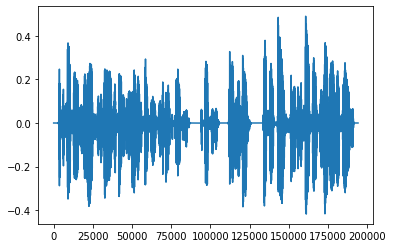

In [219]:
plt.plot(f.view(-1))

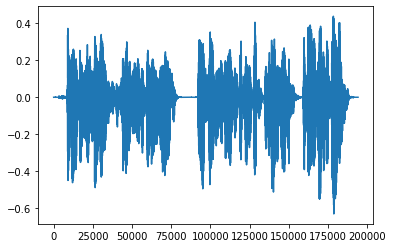

In [220]:
plt.plot(g.view(-1))

In [221]:
pad = torch.nn.utils.rnn.pad_sequence(data, batch_first=True).shape

In [222]:
pad

torch.Size([1, 2, 194240, 1])

In [171]:
a = torch.randn([1,512,194])

torch.Size([1, 1, 194, 512])

In [177]:
F.interpolate(a.contiguous().view(1, 1, -1, 256 * 2), size=(7, 256 * 2), mode='bicubic', align_corners=False).shape

torch.Size([1, 1, 7, 512])